In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [3]:
ucl

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,32,8,15,0,0,0,2,994,13,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,Kevin,Forward,22,Brazil,Shakhtar Donetsk,Premier Liga,League_phase,E,12.0,...,17,7,0,0,0,0,0,460,7,1
206,207,Cabella,Midfielder,35,France,Lille,Ligue 1,Round16,C,3.0,...,13,3,4,0,0,0,0,388,7,3
207,208,Locatelli,Midfielder,27,Italy,Juventus,Serie A,Knockout_phase,D,35.0,...,51,19,17,0,0,0,0,673,9,1
208,209,Palacios,Midfielder,26,Argentina,Bayer Leverkusen,Bundesliga,Round16,C,40.0,...,48,10,13,0,0,0,0,666,10,0


In [126]:
ucl['Team'] = ucl['Team'].str.strip()

In [4]:
ucl[['Age','Total_attempts','Passes_completed','Chances_Created']].describe()

,Age,Total_attempts,Passes_completed,Chances_Created
count,210.000000,210.000000,210.000000,210.000000
mean,26.780952,12.661905,364.223810,10.123810
std,4.416110,11.322374,216.590771,7.911224
min,17.000000,0.000000,47.000000,0.000000
25%,24.000000,5.000000,209.250000,4.000000
50%,26.000000,10.000000,319.000000,9.000000
75%,29.750000,18.000000,450.000000,15.000000
max,39.000000,64.000000,1308.000000,39.000000


<Axes: xlabel='count', ylabel='Position'>

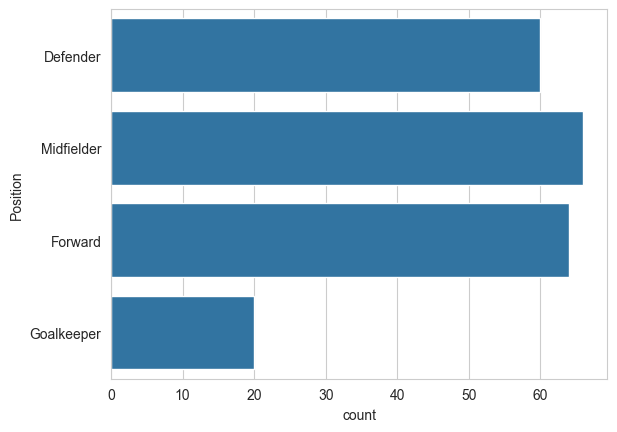

In [5]:
sns.countplot(ucl.Position)

In [6]:
bestplayer = ucl[ucl['MOTM_Awards'] > 2]

In [7]:
bestplayer.value_counts()

PlayerID  Player            Position    Age  Nationality  Team             Competitions  Phase            Phase_Tier  Value10^6  Jersey_Num  Rating  Goals  Assists  TopSpeed(km/h)  DistanceCovered(km)  Total_attempts  Dribbles  Passes_completed  Chances_Created  Balls_recovered  Tackles_Won  Tackles_Lost  Saves  Goals_Conceded  Clean_Sheets  MOTM_Awards  Minutes_played  Match_played  DNP
4         Raphinha          Forward     28   Brazil       Barcelona        La Liga       Semi_finals      A           80.0       11          8.31    13     9        34.7            126.8                52              24        433               39               18               2            7             0      0               0             3            1225            14            0      1
38        Vinicius Jr       Forward     24   Brazil       Real Madrid      La Liga       Quarter_finals   B           200.0      7           7.79    8      3        35.5            118.9                42         

In [8]:
young_age_old = ucl.Age.min(), ucl.Age.max()

In [9]:
print(young_age_old)

(np.int64(17), np.int64(39))


In [10]:
ucl.groupby("Player").mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000020306122600>>

In [11]:
values_stats = ucl['Value10^6'].describe()

values_stats

count    210.000000
mean      39.684524
std       36.107141
min        0.750000
25%       16.250000
50%       30.000000
75%       50.000000
max      200.000000
Name: Value10^6, dtype: float64

In [12]:
barcelona_players = ucl[ucl['Team'] == 'Barcelona']


In [13]:
barcelona_players

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
40,41,Kounde,Defender,26,France,Barcelona,La Liga,Semi_finals,A,60.0,...,56,8,5,0,0,0,0,1106,13,1
56,57,Pedri,Midfielder,22,Spain,Barcelona,La Liga,Semi_finals,A,80.0,...,52,3,4,0,0,0,2,1117,14,0
89,90,Inigo Martinez,Defender,33,Spain,Barcelona,La Liga,Semi_finals,A,5.0,...,50,4,8,0,0,0,1,958,11,3
111,112,Dani Olmo,Midfielder,27,Spain,Barcelona,La Liga,Semi_finals,A,60.0,...,16,2,2,0,0,0,0,440,9,5
141,142,Balde,Defender,21,Spain,Barcelona,La Liga,Semi_finals,A,60.0,...,31,6,3,0,0,0,0,804,10,4
147,148,Casado,Midfielder,21,Spain,Barcelona,La Liga,Semi_finals,A,30.0,...,40,20,15,0,0,0,0,631,10,4
162,163,Szczesny,Goalkeeper,35,Poland,Barcelona,La Liga,Semi_finals,A,1.0,...,0,0,0,28,17,2,0,750,8,6


In [17]:
fig = px.histogram(ucl,x='Age',nbins=12,title='Age distribution of players in the Champions League')

fig.update_layout(
    bargap=0.1,
    xaxis_title='Age',
    yaxis_title='Numbers of Players'
)

fig.show()

In [34]:
def age_group(age):
    if age <= 20:
        return '17 & 20'
    elif 20 < age <= 25:
        return '20 & 25'
    elif 25 < age <= 30:
        return '25 & 32'
    else:
        return '32'


In [35]:
ucl_group_age = ucl['Age'].apply(age_group)

In [36]:
age_group_counts = ucl_group_age.value_counts().reset_index()

In [37]:
age_group_counts.columns = ['Age Group', 'Count']

# Pie chart
fig = px.pie(
    age_group_counts,
    names='Age Group',
    values='Count',
    title='Total Players by Age Groups',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [127]:
team_counts = ucl['Team'].value_counts()

team_counts

Team
Inter               13
Barcelona           12
Arsenal FC          12
Paris SG            12
Real Madrid         11
BVB Dortmund        11
PSV Eindhoven       10
Bayern Munich       10
Liverpool FC        10
Benfica              9
Atalanta BC          9
Aston Villa          8
Atletico Madrid      8
Bayer Leverkusen     7
Milan                7
Monaco               7
Manchester City      7
Celtic               6
Lille                6
Sporting CP          6
Club Brugge          5
Juventus             5
Feyenoord            4
Bologna              4
Shakhtar Donetsk     3
Brest                2
VfB Stuttgart        2
Sturm Graz           1
Leipzig              1
Dinamo Zagreb        1
Girona               1
Name: count, dtype: int64

In [139]:
team_counts = ucl['Team'].value_counts()
valid_teams = team_counts[team_counts >= 8].index

# Create a new DataFrame with exactly 8 players from each valid team
winner_team_probabilities = ucl[ucl['Team'].isin(valid_teams)].groupby('Team').head(8)

# Now you can do value_counts() on the balanced dataset
balanced_team_counts = winner_team_probabilities['Team'].value_counts()


In [140]:
balanced_team_counts

Team
Inter              8
Barcelona          8
Liverpool FC       8
Real Madrid        8
Arsenal FC         8
Benfica            8
Atletico Madrid    8
Paris SG           8
PSV Eindhoven      8
BVB Dortmund       8
Aston Villa        8
Atalanta BC        8
Bayern Munich      8
Name: count, dtype: int64

In [146]:
winner_team_probabilities = (
    ucl[ucl['Team'].isin(valid_teams)]
    .sort_values(by='Value10^6', ascending=False)
    .groupby('Team')
    .head(8)
    .groupby('Team')['Value10^6']
    .sum()
    .sort_values(ascending=False)
)

balanced_teams

Team
Real Madrid        945.0
Arsenal FC         740.0
Barcelona          600.0
Bayern Munich      522.0
Liverpool FC       505.0
Inter              503.0
Paris SG           490.0
Aston Villa        281.0
Atletico Madrid    260.0
BVB Dortmund       256.0
Atalanta BC        220.0
PSV Eindhoven      192.0
Benfica            163.0
Name: Value10^6, dtype: float64

In [142]:
180 + 45 + 180 + 200 + 30 + 80 + 100 + 130

945

In [147]:
top_dribblers = ucl.sort_values(by='Dribbles', ascending=False).head(20)

In [148]:
top_dribblers

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
37,38,Vinicius Jr,Forward,24,Brazil,Real Madrid,La Liga,Quarter_finals,B,200.0,...,20,3,11,0,0,0,3,1104,12,2
84,85,Rafael Leao,Forward,25,Portugal,Milan,Serie A,Knockout_phase,D,75.0,...,3,1,8,0,0,0,3,797,10,0
75,76,Dembele,Forward,27,France,Paris SG,Ligue 1,Final,S,75.0,...,14,1,5,0,0,0,2,1163,15,2
167,168,Jamal Musiala,Forward,22,Germany,Bayern Munich,Bundesliga,Quarter_finals,B,150.0,...,29,5,6,0,0,0,1,866,12,2
164,165,Gittens,Forward,20,England,BVB Dortmund,Bundesliga,Quarter_finals,B,50.0,...,21,1,3,0,0,0,1,848,14,0
82,83,Barcola,Forward,22,France,Paris SG,Ligue 1,Final,S,45.0,...,18,4,5,0,0,0,1,1096,17,0
188,189,Rogers,Midfielder,22,England,Aston Villa,Premier League,Quarter_finals,B,50.0,...,12,4,4,0,0,0,2,1025,12,0
93,94,Desire Doue,Forward,19,France,Paris SG,Ligue 1,Final,S,60.0,...,20,5,9,0,0,0,1,742,16,1
171,172,Olise,Forward,23,France,Bayern Munich,Bundesliga,Quarter_finals,B,58.0,...,24,3,11,0,0,0,1,1033,14,0


In [175]:
fig = px.bar(
    top_dribblers,
    x='Player',
    y='Dribbles',
    color='Dribbles',
    text='Dribbles',
    hover_name='Team',
    title='Top Dribblers Players in Champions League 2025 Season',

)

fig.update_traces(textposition='inside')
fig.update_layout(xaxis_tickangle=-50, uniformtext_minsize=10)

fig.show()